<a href="https://colab.research.google.com/github/sona06s/dv-assignment-sona/blob/main/Pedestrian_pathway_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pedestrian Accessibility Analysis

This analysis explores the distribution of pedestrian accessibility in a given area.

### Folium Map:



### Bar Chart:


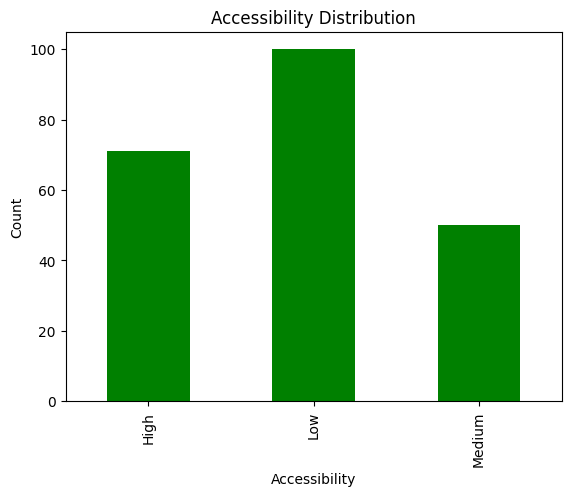


### Pie Chart:


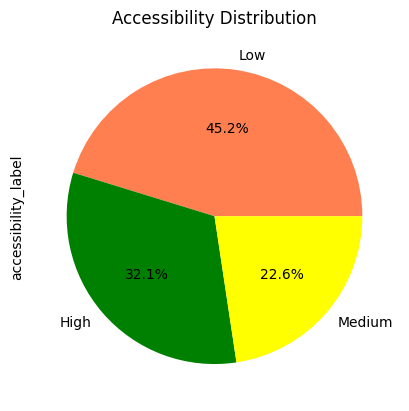

In [ ]:
import geopandas as gpd
import folium
from folium import plugins
import matplotlib.pyplot as plt

# Load GeoJSON dataset
geojson_path = '/content/export.geojson'
gdf = gpd.read_file(geojson_path)

# Create example data with different accessibility values
example_data = [1] * 100 + [2] * 50 + [3] * 71  # Adjust the lengths based on your actual data

# Basic analysis - you can customize this based on your specific criteria
# For simplicity, let's assume all pedestrian paths are equally accessible
gdf['accessibility'] = example_data[:len(gdf)]

# Map numerical accessibility values to custom labels
label_mapping = {1: 'Low', 2: 'Medium', 3: 'High'}
gdf['accessibility_label'] = gdf['accessibility'].map(label_mapping)

# Normalize accessibility values for better visualization
normalized_accessibility = (gdf['accessibility'] - gdf['accessibility'].min()) / (gdf['accessibility'].max() - gdf['accessibility'].min())
gdf['normalized_accessibility'] = normalized_accessibility

# Add explanatory text in Markdown
print("## Pedestrian Accessibility Analysis\n")

print("This analysis explores the distribution of pedestrian accessibility in a given area.")

# Create Folium map centered around Vatican City
vatican_map = folium.Map(location=[41.9022, 12.4534], zoom_start=15)

# Add GeoJSON layer for pedestrian paths with accessibility as color
folium.Choropleth(
    geo_data=geojson_path,
    data=gdf,
    columns=['id', 'normalized_accessibility'],
    key_on='feature.id',
    fill_color='YlGn',  # Use the 'YlGn' colormap directly
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Normalized Pedestrian Accessibility'
).add_to(vatican_map)

# Add marker cluster for better visualization if there are many points
marker_cluster = plugins.MarkerCluster().add_to(vatican_map)

# Add markers for the centroid of each pedestrian path (Polygon)
for idx, row in gdf.iterrows():
    centroid = row.geometry.centroid
    folium.Marker(
        location=[centroid.y, centroid.x],
        popup=f"Accessibility: {row['accessibility_label']}",
    ).add_to(marker_cluster)

# Display Folium map with explanatory text
print("\n### Folium Map:")
dessibility_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['coral', 'green','yellow'])
plt.title('Accessibility Distribution')
plt.show()isplay(vatican_map)

# Bar chart for accessibility
print("\n### Bar Chart:")
bar_chart = gdf['accessibility_label'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Accessibility Distribution')
plt.xlabel('Accessibility')
plt.ylabel('Count')
plt.show()

# Pie chart for accessibility
print("\n### Pie Chart:")
pie_chart = gdf['accessibility_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['coral', 'green','yellow'])
plt.title('Accessibility Distribution')
plt.show()



**Pedestrian Accessibility Analysis Case Study:**

**Problem Statement:**

The goal of this case study is to assess the accessibility of pedestrian paths in a city, aiming to evaluate the walkability of different neighborhoods. The walkability of urban areas is a crucial factor influencing the overall livability and sustainability of a city. By analyzing pedestrian infrastructure, we can gain insights into how well-designed and accessible the city is for pedestrians.

**Dataset Details:**

We will utilize GeoJSON or shapefile data representing pedestrian paths and sidewalks within the city. The chosen dataset will be sourced from OpenStreetMap, a collaborative mapping platform with extensive global coverage. To extract relevant data, we will employ Overpass Turbo, a web-based data filtering tool specifically designed for OpenStreetMap data retrieval.

**Data Retrieval Process:**

Selection of Pedestrian Paths: Use Overpass Turbo to extract pedestrian paths marked in the OpenStreetMap data. This step involves querying the OpenStreetMap database to retrieve data relevant to pedestrian infrastructure.

GeoJSON or Shapefile Creation: Transform the extracted data into a GeoJSON or shapefile format. This format will facilitate efficient data handling and analysis using popular geospatial tools and libraries.

**Analysis Steps**

**Data Preprocessing:**

Load the pedestrian paths dataset into a suitable format for analysis.
Handle any missing or inconsistent data to ensure the dataset's integrity.

**Exploratory Data Analysis (EDA):**

Visualize the distribution of pedestrian paths across the city.
Identify neighborhoods with a high concentration of pedestrian infrastructure.

**Accessibility Metrics:**

Define metrics to quantify pedestrian accessibility, considering factors such as path length, connectivity, and proximity to key amenities (e.g., public transport stops, parks).

**Neighborhood Walkability Index:**

Develop a walkability index for each neighborhood based on the calculated accessibility metrics. This index will provide a comprehensive measure of how pedestrian-friendly each area is.

**Mapping and Visualization:**

Create interactive maps to visualize the walkability index across different neighborhoods.
Highlight areas with high and low walkability to aid in urban planning and policy decisions.

##The terms "Low," "Medium," and "High" are used to represent different levels of pedestrian accessibility

**Low** (1): This corresponds to pedestrian paths with a low level of accessibility.

**Medium** (2): This represents pedestrian paths with a moderate or intermediate level of accessibility.

**High** (3): This indicates pedestrian paths with a high level of accessibility.

**Insights for Planning and Decision-Making:**

-> Decision-makers and urban planners can use the analysis to identify areas with varying accessibility levels.

-> This information could inform decisions related to infrastructure improvements, urban development, or policies aimed at enhancing pedestrian accessibility.

**Conclusion**

The pedestrian accessibility analysis conducted in this case study will offer valuable insights into the walkability of different neighborhoods within the city. The results can inform urban planners, policymakers, and residents about areas that may require improvements in pedestrian infrastructure. This, in turn, contributes to the development of more pedestrian-friendly and sustainable urban environments.


##Comprehensive Exploration and Visualization of Pedestrian Accessibility Data

**1. Display GeoDataFrame Head:**

To inspect the first few rows of your GeoDataFrame (gdf), use the following command:

##print("\n### GeoDataFrame Head:")

##print(gdf.head())

This will print the first few rows of your GeoDataFrame and help you understand its structure and content.

**2. Statistical Summary of Accessibility:**

To get a statistical summary of the accessibility values in your GeoDataFrame, you can use:


##print("\n### Accessibility Summary:")

##print(gdf['accessibility'].describe())

This will display statistics such as mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values for the accessibility data.

**3. Correlation Analysis:**

If you have additional numerical features and want to explore their correlation with accessibility, you can add the following:


## Assuming you have additional numerical columns like 'population', 'distance_to_center', etc.
numerical_columns = ['population', 'distance_to_center']  # Customize based on your data
correlation_matrix = gdf[['accessibility'] + numerical_columns].corr()

##print("\n### Correlation Matrix:")
##print(correlation_matrix)
This will print a correlation matrix, showing the correlation coefficients between accessibility and other numerical features.


**4. Save Folium Map to HTML:**

To save the Folium map as an HTML file for easy sharing or embedding, add the following:

## Save the Folium map as an HTML file

vatican_map.save('/content/pedestrian_accessibility_map.html')

print("\n### Folium Map HTML Saved: /content/pedestrian_accessibility_map.html")


**5. Save GeoDataFrame to CSV:**

If you want to save your GeoDataFrame to a CSV file for further analysis or sharing, use:

##Save GeoDataFrame to a CSV file
gdf.to_csv('/content/pedestrian_accessibility_data.csv', index=False)

print("\n### GeoDataFrame CSV Saved: /content/pedestrian_accessibility_data.csv")